In [126]:
# ws5
import pandas as pd
uri = 'data/sale_quarterly1.xlsx'
cols = 'b:e'
df = pd.read_excel(uri, sheet_name='Sheet1', usecols=cols, header=2)
df.head(4)

,Employee,Sales,Quarter,Country
0,ณิแนน,1000,1,US
1,กอบเกียรติ,300,1,ญี่ปุ่น
2,Tina,400,1,ไทย
3,Maria,500,1,UK


In [127]:
df.shape

(20, 4)

In [128]:
df.dtypes

Employee    object
Sales        int64
Quarter      int64
Country     object
dtype: object

In [129]:
df.describe()


,Sales,Quarter
count,20.000000,20.000000
mean,570.500000,2.500000
std,349.186649,1.147079
min,50.000000,1.000000
25%,287.500000,1.750000
50%,600.000000,2.500000
75%,900.000000,3.250000
max,1000.000000,4.000000


In [130]:
# 
uri = 'data/sale_quarterly1.xlsx'
cols = 'b:e'
df = pd.read_excel(uri, sheet_name='Sheet1', usecols=cols, header=2, dtype={'Quarter':str})
df.head()
df.describe()

,Sales
count,20.000000
mean,570.500000
std,349.186649
min,50.000000
25%,287.500000
50%,600.000000
75%,900.000000
max,1000.000000


In [131]:
df.Quarter = df.Quarter.astype('category')
df.dtypes

Employee      object
Sales          int64
Quarter     category
Country       object
dtype: object

In [132]:
df.describe()

,Sales
count,20.000000
mean,570.500000
std,349.186649
min,50.000000
25%,287.500000
50%,600.000000
75%,900.000000
max,1000.000000


In [133]:
df.Sales.sum()

np.int64(11410)

In [134]:
# df.head()
# df.mean()
# df.std()
# df.max()
# df.min()
#df.sum()

In [135]:
# ws6
pvt = df.pivot_table(index='Quarter',values='Sales') 
pvt = df.pivot_table(index='Quarter',values='Sales', margins=True) 
pvt

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\1816639024.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df.pivot_table(index='Quarter',values='Sales')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\1816639024.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df.pivot_table(index='Quarter',values='Sales', margins=True)


,Sales
Quarter,
1,600.0
2,462.0
3,630.0
4,590.0
All,570.5


In [136]:
df.groupby('Quarter')['Sales'].mean()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\399579889.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Quarter')['Sales'].mean()


Quarter
1    600.0
2    462.0
3    630.0
4    590.0
Name: Sales, dtype: float64

In [137]:
# ws7 
pvt = df.pivot_table(index=['Quarter','Employee'] ,values='Sales', margins=True) # mean  , margins=True
pvt

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\2590517131.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df.pivot_table(index=['Quarter','Employee'] ,values='Sales', margins=True) # mean  , margins=True


Sales
Quarter Employee          
1       Bill         800.0
        Maria        500.0
        Tina         400.0
        กอบเกียรติ   300.0
        ณิแนน       1000.0
2       Bill          60.0
        Maria         50.0
        Tina         700.0
        กอบเกียรติ   500.0
        ณิแนน       1000.0
3       Bill         300.0
        Maria        200.0
        Tina         750.0
        กอบเกียรติ   900.0
        ณิแนน       1000.0
4       Bill          50.0
        Maria        750.0
        Tina         250.0
        กอบเกียรติ   900.0
        ณิแนน       1000.0
All                  570.5

In [138]:
# ws8 

import numpy as np

pvt = df.pivot_table(index=['Quarter'], aggfunc=np.sum, margins=True) 
pvt = df.pivot_table(index=['Quarter'], aggfunc='sum', margins=True) 
pvt = df.pivot_table(index=['Quarter'], values='Sales', aggfunc='sum', margins=True) 
# pvt.applymap("THB{0:,.2f}".format) 
pvt = pvt.applymap("{0:,}".format) 
# pvt.style.format({'Sales': "{:,.2f}"}) 
pvt

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\2488655469.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df.pivot_table(index=['Quarter'], aggfunc=np.sum, margins=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\2488655469.py:5: FutureWarning: The provided callable <function sum at 0x000001A6286FA160> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pvt = df.pivot_table(index=['Quarter'], aggfunc=np.sum, margins=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\2488655469.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'USญี่ปุ่นไทยUKUSไทยญี่ปุ่นไทยUSUSUSญี่ปุ่นไทยUKไทยญี่ปุ่นญี่ปุ่นไทยUKUS' h

,Sales
Quarter,
1,"3,000"
2,"2,310"
3,"3,150"
4,"2,950"
All,"11,410"


In [139]:
df.groupby('Quarter').sum()
# df.groupby(['Country','Quarter']).sum()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\151865662.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Quarter').sum()


,Employee,Sales,Country
Quarter,,,
1,ณิแนนกอบเกียรติTinaMariaBill,3000,USญี่ปุ่นไทยUKUS
2,ณิแนนกอบเกียรติTinaMariaBill,2310,ไทยญี่ปุ่นไทยUSUS
3,ณิแนนกอบเกียรติTinaMariaBill,3150,USญี่ปุ่นไทยUKไทย
4,ณิแนนกอบเกียรติTinaMariaBill,2950,ญี่ปุ่นญี่ปุ่นไทยUKUS


In [140]:
# ws9
# pvt = df.pivot_table(index=['Quarter'], values=['Sales'],
#         aggfunc=['sum','mean'], margins=True)
#
pvt = df.pivot_table(index=['Quarter'], values=['Sales'],
        aggfunc=['sum','max','min','mean'], margins=True)

pvt

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\399461776.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df.pivot_table(index=['Quarter'], values=['Sales'],
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\399461776.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df.pivot_table(index=['Quarter'], values=['Sales'],
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\399461776.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df.pivot_table(index=['Quarter'], values=['Sales'],
C

,sum,max,min,mean
,Sales,Sales,Sales,Sales
Quarter,,,,
1,3000,1000,300,600.0
2,2310,1000,50,462.0
3,3150,1000,200,630.0
4,2950,1000,50,590.0
All,11410,1000,50,570.5


In [141]:
df['Import'] = df['Sales']  - 50
display(df.head())
df.head()

,Employee,Sales,Quarter,Country,Import
0,ณิแนน,1000,1,US,950
1,กอบเกียรติ,300,1,ญี่ปุ่น,250
2,Tina,400,1,ไทย,350
3,Maria,500,1,UK,450
4,Bill,800,1,US,750


,Employee,Sales,Quarter,Country,Import
0,ณิแนน,1000,1,US,950
1,กอบเกียรติ,300,1,ญี่ปุ่น,250
2,Tina,400,1,ไทย,350
3,Maria,500,1,UK,450
4,Bill,800,1,US,750


In [142]:
pvt = df.pivot_table(index=['Quarter'], values=['Sales','Import'],
        aggfunc={'Sales':'sum','Import':'mean'}, margins=True)

pvt

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\3705810360.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df.pivot_table(index=['Quarter'], values=['Sales','Import'],


,Import,Sales
Quarter,,
1,550.0,3000
2,412.0,2310
3,580.0,3150
4,540.0,2950
All,520.5,11410


In [143]:
# ws10
pvt = df.pivot_table(index=['Quarter'], values='Sales', aggfunc='sum') 
pvt = pvt.applymap("{0:,}".format) 
# pvt.sort_values('Sales')
pvt = pvt.sort_values('Sales', ascending=False)
## pvt.Sales.sort_values()
pvt


C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\4048916228.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df.pivot_table(index=['Quarter'], values='Sales', aggfunc='sum')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\4048916228.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pvt = pvt.applymap("{0:,}".format)


,Sales
Quarter,
3,"3,150"
1,"3,000"
4,"2,950"
2,"2,310"


C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\4139218446.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df.pivot_table(index=['Quarter'], values='Sales', aggfunc='sum') #


<Axes: xlabel='Quarter'>

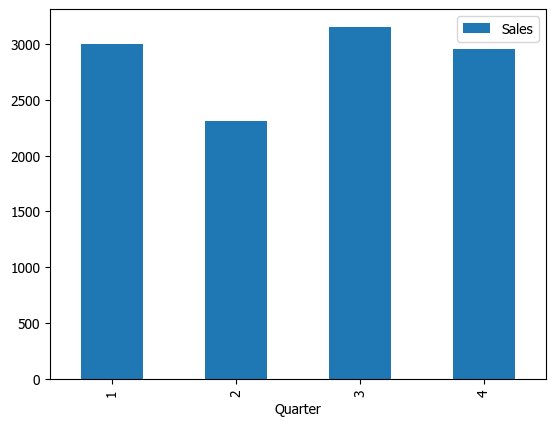

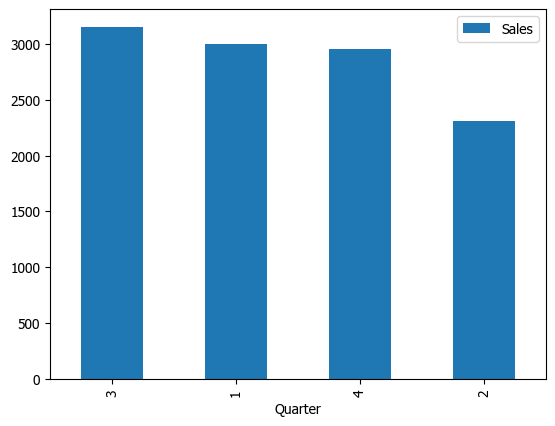

In [144]:
# ws11
%matplotlib inline
pvt = df.pivot_table(index=['Quarter'], values='Sales', aggfunc='sum') # 
pvt.plot.bar()


# pvt.sort_values('Sales')
pvt_sorted = pvt.sort_values('Sales', ascending=False)
pvt_sorted.plot.bar()



,Sales
Employee,
Bill,1210
Maria,1500
Tina,2100
กอบเกียรติ,2600
ณิแนน,4000


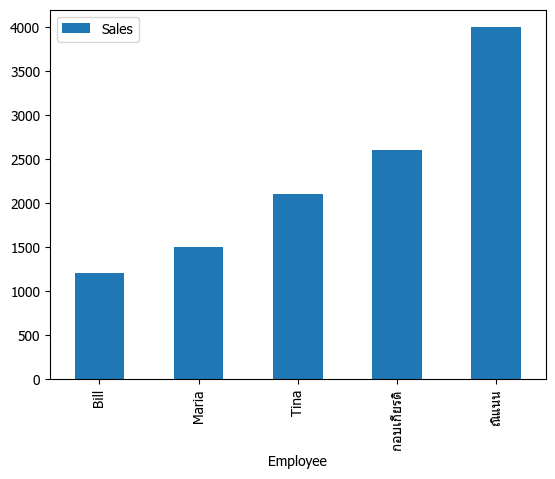

In [149]:
# ws12 
import matplotlib.pyplot as plt
plt.rc('font', family='tahoma')

pvt = df.pivot_table(index=['Employee'], values=['Sales'], aggfunc='sum')
#pvt.sort_values(['Sales'], ascending=[0])
#pvt.sort_values('Sales', ascending=False)
pvt.plot.bar()
pvt

,Sales
Country,
UK,1450
US,2960
ญี่ปุ่น,3600
ไทย,3400


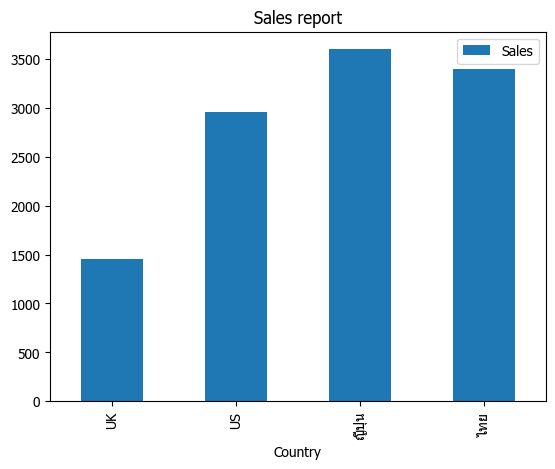

In [152]:
# ws13
pvt = df.pivot_table(index=['Country'], values=['Sales'], aggfunc='sum')

#pvt.sort_values(['Sales'],ascending=[False])  # ceo blt : top by country
pvt.plot.bar()
plt.title("Sales report")
pvt

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\4005908531.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df.pivot_table(index=['Country','Quarter'], values='Sales', aggfunc='sum')


Sales
Country Quarter       
UK      1          500
        2            0
        3          200
        4          750
US      1         1800
        2          110
        3         1000
        4           50
ญี่ปุ่น 1          300
        2          500
        3          900
        4         1900
ไทย     1          400
        2         1700
        3         1050
        4          250

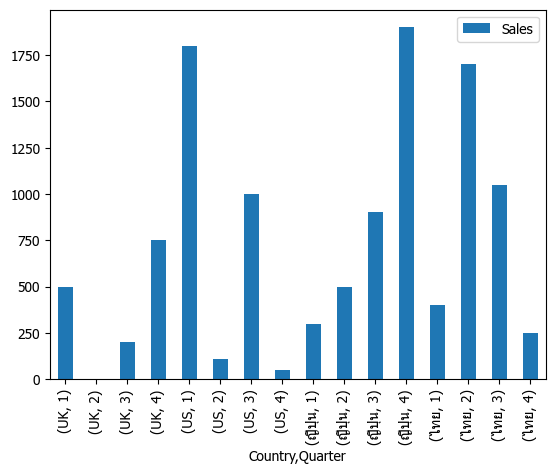

In [87]:
pvt = df.pivot_table(index=['Country','Quarter'], values='Sales', aggfunc='sum')
pvt.plot.bar()
pvt

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\2530031212.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt2 = df.pivot_table(index=['Country'], columns=['Quarter'], values=['Sales'], aggfunc='sum',
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\2530031212.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df.pivot_table(index=['Country'], columns=['Quarter'], values=['Sales'], aggfunc='sum',
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\2530031212.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pvt = pvt.applymap("{0:,}".format) #


Sales                             
Quarter      1      2      3      4     All
Country                                    
UK         500      0    200    750   1,450
US       1,800    110  1,000     50   2,960
ญี่ปุ่น    300    500    900  1,900   3,600
ไทย        400  1,700  1,050    250   3,400
All      3,000  2,310  3,150  2,950  11,410

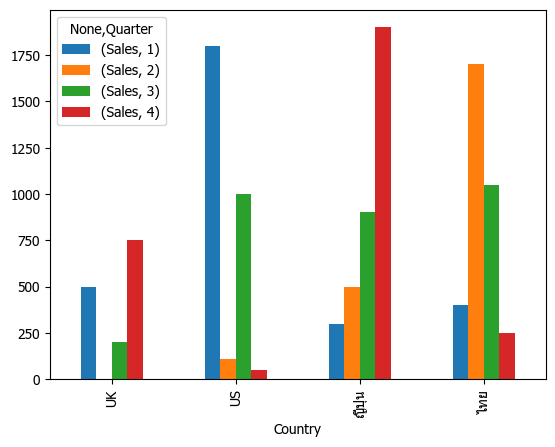

In [154]:
# ws14
# for graph
pvt2 = df.pivot_table(index=['Country'], columns=['Quarter'], values=['Sales'], aggfunc='sum', 
                fill_value=0)
pvt2.plot.bar()

# for table
pvt = df.pivot_table(index=['Country'], columns=['Quarter'], values=['Sales'], aggfunc='sum', 
                fill_value=0, margins=True)
pvt = pvt.applymap("{0:,}".format) # 
pvt

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\1389376970.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df.pivot_table(index=['Country'], columns=['Quarter'], values=['Sales'], aggfunc='sum',
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\1389376970.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pvt = pvt.applymap("{0:,}".format) #


Sales                             
Quarter      1      2      3      4     All
Country                                    
UK         500      0    200    750   1,450
US       1,800    110  1,000     50   2,960
ญี่ปุ่น    300    500    900  1,900   3,600
ไทย        400  1,700  1,050    250   3,400
All      3,000  2,310  3,150  2,950  11,410

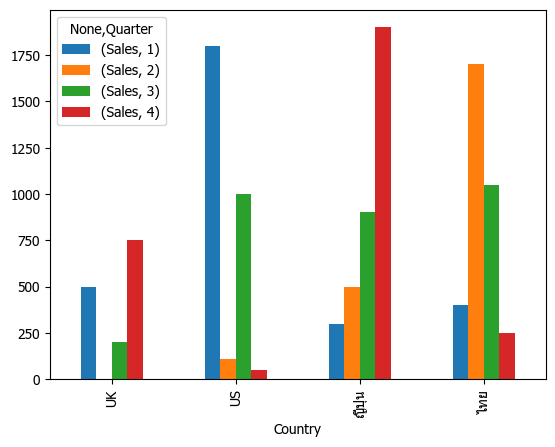

In [89]:
# 
# for table
pvt = df.pivot_table(index=['Country'], columns=['Quarter'], values=['Sales'], aggfunc='sum', 
                fill_value=0, margins=True)

# for graph
g = pvt.drop('All') 
g.drop('All', level=1, axis=1, inplace=True) 
g.plot.bar()

pvt = pvt.applymap("{0:,}".format) #
pvt

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\2654331021.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pvt = pvt.applymap("{0:,}".format) #


Sales                                        
Employee   Bill  Maria   Tina กอบเกียรติ  ณิแนน     All
Country                                                
UK            0  1,450      0          0      0   1,450
US          910     50      0          0  2,000   2,960
ญี่ปุ่น       0      0      0      2,600  1,000   3,600
ไทย         300      0  2,100          0  1,000   3,400
All       1,210  1,500  2,100      2,600  4,000  11,410

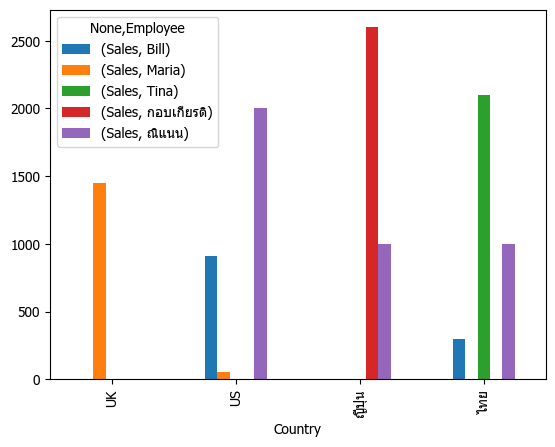

In [90]:
# ws15
# for graph
pvt2 = df.pivot_table(index=['Country'], columns=['Employee'], values=['Sales'], aggfunc='sum', 
                fill_value=0)
pvt2.plot.bar()

# for table
pvt = df.pivot_table(index=['Country'], columns=['Employee'], values=['Sales'], aggfunc='sum', 
                fill_value=0, margins=True)
pvt = pvt.applymap("{0:,}".format) # 
pvt

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\3483981062.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt2 = df.pivot_table(index=['Quarter'], columns=['Country'], values=['Sales'], aggfunc='sum',
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\3483981062.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df.pivot_table(index=['Quarter'], columns=['Country'], values=['Sales'], aggfunc='sum',
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\3483981062.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pvt = pvt.applymap("{0:,}".format) # ok


Sales                              
Country     UK     US ญี่ปุ่น    ไทย     All
Quarter                                     
1          500  1,800     300    400   3,000
2            0    110     500  1,700   2,310
3          200  1,000     900  1,050   3,150
4          750     50   1,900    250   2,950
All      1,450  2,960   3,600  3,400  11,410

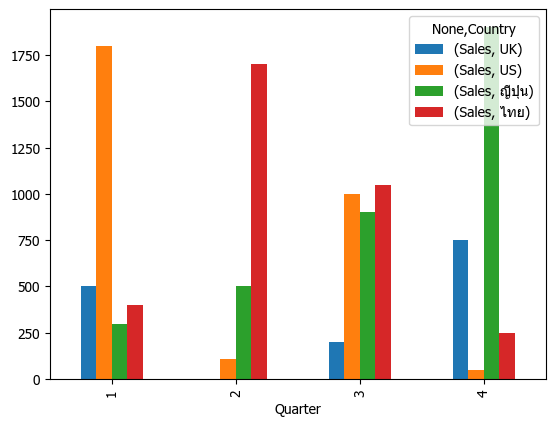

In [91]:
# ws15

# for graph
pvt2 = df.pivot_table(index=['Quarter'], columns=['Country'], values=['Sales'], aggfunc='sum', 
                fill_value=0)
pvt2.plot.bar()

# for table
pvt = df.pivot_table(index=['Quarter'], columns=['Country'], values=['Sales'], aggfunc='sum', 
                fill_value=0, margins=True)
pvt = pvt.applymap("{0:,}".format) # ok
pvt

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\220232699.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pvt = pvt.applymap("{0:,}".format) # ok


Sales                              
Country        UK     US ญี่ปุ่น    ไทย     All
Employee                                       
Bill            0    910       0    300   1,210
Maria       1,450     50       0      0   1,500
Tina            0      0       0  2,100   2,100
กอบเกียรติ      0      0   2,600      0   2,600
ณิแนน           0  2,000   1,000  1,000   4,000
All         1,450  2,960   3,600  3,400  11,410

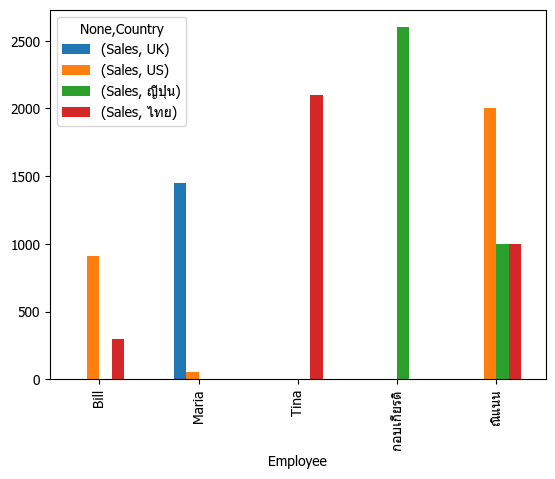

In [92]:
# 
# for graph
pvt2 = df.pivot_table(index=['Employee'], columns=['Country'], values=['Sales'], aggfunc='sum', 
                fill_value=0)
pvt2.plot.bar()

# for table
pvt = df.pivot_table(index=['Employee'], columns=['Country'], values=['Sales'], aggfunc='sum', 
                fill_value=0, margins=True)
pvt = pvt.applymap("{0:,}".format) # ok
pvt

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\860287237.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt2 = df.pivot_table(index=['Employee'], columns=['Quarter'], values=['Sales'], aggfunc='sum',
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\860287237.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df.pivot_table(index=['Employee'], columns=['Quarter'], values=['Sales'], aggfunc='sum',
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\860287237.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pvt = pvt.applymap("{0:,}".format) #


Sales                             
Quarter         1      2      3      4     All
Employee                                      
Bill          800     60    300     50   1,210
Maria         500     50    200    750   1,500
Tina          400    700    750    250   2,100
กอบเกียรติ    300    500    900    900   2,600
ณิแนน       1,000  1,000  1,000  1,000   4,000
All         3,000  2,310  3,150  2,950  11,410

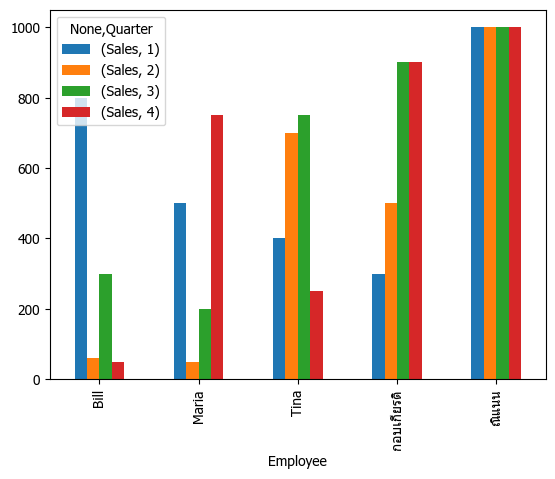

In [93]:
# ws16

# for graph
pvt2 = df.pivot_table(index=['Employee'], columns=['Quarter'], values=['Sales'], aggfunc='sum', 
                fill_value=0)
pvt2.plot.bar()

# for table
pvt = df.pivot_table(index=['Employee'], columns=['Quarter'], values=['Sales'], aggfunc='sum', 
                fill_value=0, margins=True)
pvt = pvt.applymap("{0:,}".format) # 
pvt

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\2599169939.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt2 = df.pivot_table(index=['Country'], columns=['Quarter'], values=['Sales'], aggfunc='count',
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\2599169939.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df.pivot_table(index=['Country'], columns=['Quarter'], values=['Sales'], aggfunc='count',
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\2599169939.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pvt = pvt.applymap("{0:,}".format) # ok


Sales             
Quarter     1  2  3  4 All
Country                   
UK          1  0  1  1   3
US          2  2  1  1   6
ญี่ปุ่น     1  1  1  2   5
ไทย         1  2  2  1   6
All         5  5  5  5  20

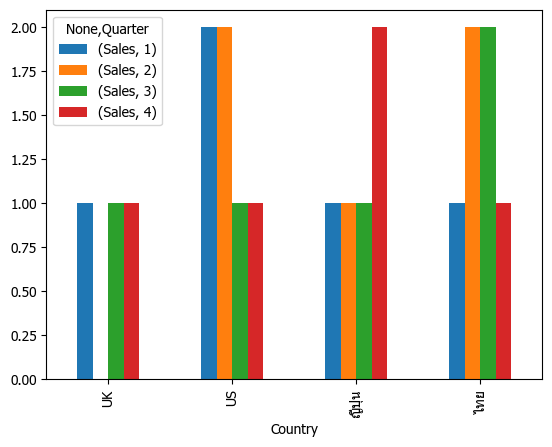

In [94]:
#
# for graph
pvt2 = df.pivot_table(index=['Country'], columns=['Quarter'], values=['Sales'], aggfunc='count', 
                fill_value=0)
pvt2.plot.bar()

# for table
pvt = df.pivot_table(index=['Country'], columns=['Quarter'], values=['Sales'], aggfunc='count', 
                fill_value=0, margins=True)
pvt = pvt.applymap("{0:,}".format) # ok
pvt

In [95]:
df.dtypes
df.Quarter = df.Quarter.astype('int')

In [96]:
# ws17
pvt = df[df.Quarter == 3].pivot_table(index='Country',columns='Quarter',values='Sales', 
                                      aggfunc='sum')
pvt

Quarter,3
Country,
UK,200
US,1000
ญี่ปุ่น,900
ไทย,1050


In [97]:
pvt = df[(df.Quarter == 3) & 
         (df.Sales >= 100)].pivot_table(index='Country', 
                      columns='Quarter',values='Sales',aggfunc='sum')
pvt

Quarter,3
Country,
UK,200
US,1000
ญี่ปุ่น,900
ไทย,1050


In [98]:
pvt = df[(df.Quarter == 3) | (df.Quarter == 1)].pivot_table(index='Country',
                                columns='Quarter',values='Sales',aggfunc='sum')
pvt

Quarter,1,3
Country,,
UK,500,200
US,1800,1000
ญี่ปุ่น,300,900
ไทย,400,1050


In [155]:
pvt = df[df.Country.str.match('U')].pivot_table(index='Country',columns='Quarter',values='Sales',fill_value=0) #fill_value=0
pvt

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\1762519855.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df[df.Country.str.match('U')].pivot_table(index='Country',columns='Quarter',values='Sales',fill_value=0) #fill_value=0


Quarter,1,2,3,4
Country,,,,
UK,500.0,0.0,200.0,750.0
US,900.0,55.0,1000.0,50.0


In [100]:
pvt = df[df.Country=='US'].pivot_table(index='Country',columns='Quarter',values='Sales') #fill_value=0
pvt

Quarter,1,2,3,4
Country,,,,
US,900.0,55.0,1000.0,50.0


Quarter,1,2,3,4,All
Employee,,,,,
Bill,800,60,300,50,1210
กอบเกียรติ,300,500,900,900,2600
All,1100,560,1200,950,3810


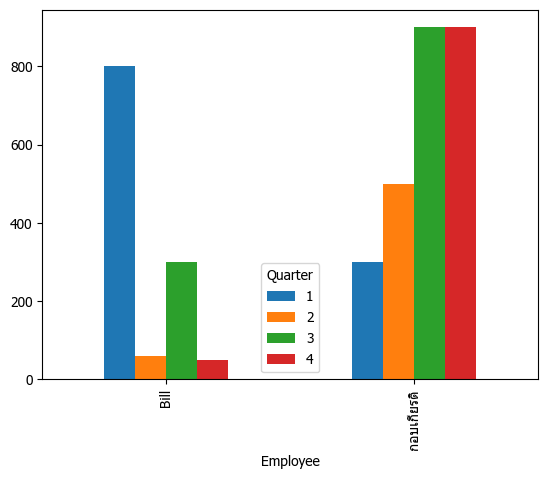

In [101]:
# ws18
# for graph
pvt2 = df[(df.Employee.str.match('กอบ')) | 
         (df.Employee.str.match('Bill'))].pivot_table(
    index='Employee',columns=['Quarter'],values='Sales',fill_value=0, 
    aggfunc='sum')
pvt2.plot.bar()

# for data
pvt = df[(df.Employee.str.match('กอบ')) | 
         (df.Employee.str.match('Bill'))].pivot_table(
    index='Employee',columns=['Quarter'],values='Sales',fill_value=0, 
    aggfunc='sum', margins=True)

pvt

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\2926498621.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  (df.Employee.str.match('Bill'))].pivot_table(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26388\2926498621.py:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  (df.Employee.str.match('Bill'))].pivot_table(


Quarter       1               2              3                4              \
Country      US ญี่ปุ่น ไทย  US ญี่ปุ่น ไทย US ญี่ปุ่น  ไทย  US ญี่ปุ่น ไทย   
Employee                                                                      
Bill        800       0   0  60       0   0  0       0  300  50       0   0   
กอบเกียรติ    0     300   0   0     500   0  0     900    0   0     900   0   
All         800     300   0  60     500   0  0     900  300  50     900   0   

Quarter      All  
Country           
Employee          
Bill        1210  
กอบเกียรติ  2600  
All         3810

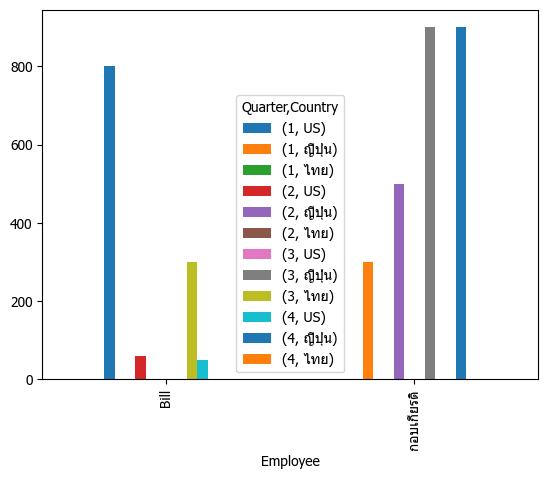

In [156]:
# ws18
# for graph
pvt2 = df[(df.Employee.str.match('กอบ')) | 
         (df.Employee.str.match('Bill'))].pivot_table(
    index='Employee',columns=['Quarter','Country'],values='Sales',fill_value=0, 
    aggfunc='sum')
pvt2.plot.bar()

# for data
pvt = df[(df.Employee.str.match('กอบ')) | 
         (df.Employee.str.match('Bill'))].pivot_table(
    index='Employee',columns=['Quarter','Country'],values='Sales',fill_value=0, 
    aggfunc='sum', margins=True)

pvt